In [1]:
%matplotlib inline

import torch, torchaudio
from torchaudio import transforms
import os
import matplotlib
import matplotlib.pyplot as plt

c:\Projects\TensorBeat\secret_sauce\.venv\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [2]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

In [3]:
project_root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("dataset_explore.ipynb"))))
filepath = os.path.join(project_root, "data", "tickle22000.wav")
filepath

'c:\\Projects\\TensorBeat\\secret_sauce\\data\\tickle22000.wav'

In [4]:
with open(filepath, mode="rb") as song:
    wave, sample_rate = torchaudio.load(song)
sample_rate

22000

In [5]:
# mix = .5
# mono=(mix*wave[0, ...]+(1-mix)*wave[1, ...])
mono = torch.mean(wave, dim=0).unsqueeze(0)
mono = mono[..., sample_rate:sample_rate*6]
mono.shape

torch.Size([1, 110000])

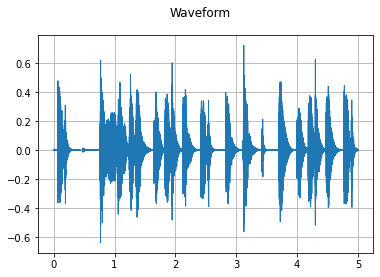

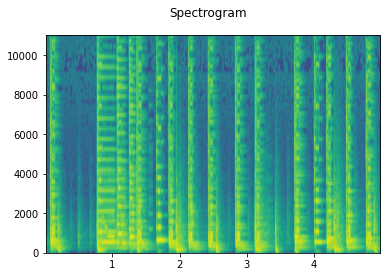

In [6]:
plot_waveform(mono, sample_rate)
plot_specgram(mono, sample_rate)